# Image Sharpening for Medical Imaging (X-ray)

**Objective:** As a radiologist, I want to sharpen an X‑ray image so that fine details in bones and tissues become more visible, helping me make a more accurate diagnosis.

**Tasks**
1. Load the provided X‑ray image.
2. Convert to grayscale (if not already).
3. Apply a sharpening kernel `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]`.
4. Compare the sharpened image to the original.
5. Save the processed image.

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
input_path = r"x-rays.png"
output_path = r"xray_sharpened.png"
print("Input image path:", input_path)
print("Output (sharpened) path:", output_path)

Input image path: x-rays.png
Output (sharpened) path: xray_sharpened.png


# 1) Load the X-ray image

In [7]:
img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
if img is None:
    raise FileNotFoundError(f"Could not read image at {input_path}. Upload the file or fix the path.")
print("Loaded image shape:", img.shape, "| dtype:", img.dtype)

Loaded image shape: (899, 662, 4) | dtype: uint8


# 2) Convert to grayscale 

In [9]:
if len(img.shape) == 3:  
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = img.copy()

print("Grayscale shape:", gray.shape, "| dtype:", gray.dtype)

Grayscale shape: (899, 662) | dtype: uint8


# 3) Apply sharpening kernel

In [10]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype=np.float32)

sharpened = cv2.filter2D(gray, ddepth=-1, kernel=kernel)
if sharpened.dtype != np.uint8:
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

print("Sharpened shape:", sharpened.shape, "| dtype:", sharpened.dtype)

Sharpened shape: (899, 662) | dtype: uint8


# 4) Compare original vs. sharpened

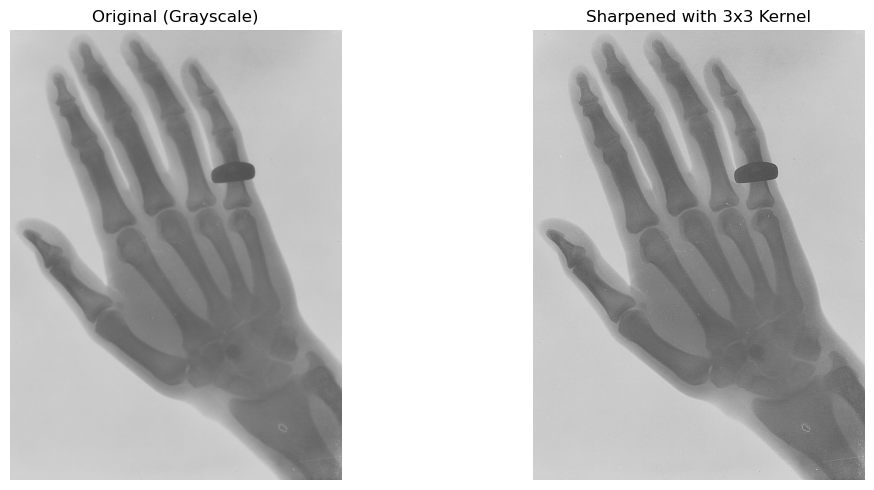

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)
plt.title("Original (Grayscale)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpened, cmap="gray", vmin=0, vmax=255)
plt.title("Sharpened with 3x3 Kernel")
plt.axis("off")

plt.tight_layout()
plt.show()

# 5) Save processed image

In [12]:
ok = cv2.imwrite(output_path, sharpened)
print("Saved:", output_path)

Saved: xray_sharpened.png
